In [1]:
# All Imports
from collections import Counter
import ConfigParser
import matplotlib.pyplot as plt
import networkx as nx
import sys
import time
from amazon.api import AmazonAPI
import io
import re
#import nltk
#nltk.download()
from nltk.corpus import sentiwordnet as swn

%matplotlib inline

In [ ]:
"""from bs4 import BeautifulSoup
import urllib
import urllib2
headers = {'User-agent': 'Mozilla/5.0 (Windows NT 6.2; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/37.0.2062.120 Safari/537.36'}
url = 'http://www.amazon.com/dp/0439136369'
data = urllib.urlencode(headers)
req = urllib2.Request(url,data)
soup = BeautifulSoup(urllib2.urlopen(req).read())
for x in soup.find_all('table',id='productDetailsTable'):
    for tag in x.find_all('li'):
        tag.get_text()"""

In [14]:
"""from pprint import pprint
from bs4 import BeautifulSoup
import requests

url = 'http://www.amazon.com/dp/0439136369'
response = requests.get(url, headers={'User-agent': 'Mozilla/5.0 (Windows NT 6.2; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/37.0.2062.120 Safari/537.36'})

soup = BeautifulSoup(response.content)
tags = {}
for li in soup.select('table#productDetailsTable div.content ul li'):
    try:
        title = li.b
        key = title.text.strip().rstrip(':')
        value = title.next_sibling.strip()
        
        tags[key] = value
    except AttributeError:
        break

pprint(tags)"""

{u'Age Range': u'9 - 12 years',
 u'Amazon Best Sellers Rank': u'#572 in Books (',
 u'Average Customer Review': u'',
 u'Grade Level': u'4 - 7',
 u'ISBN-10': u'0439136369',
 u'ISBN-13': u'978-0439136365',
 u'Language': u'English',
 u'Lexile Measure': u'880L',
 u'Paperback': u'448 pages',
 u'Product Dimensions': u'1.2 x 5.2 x 7.8 inches',
 u'Publisher': u'Scholastic Paperbacks (October 1, 2001)',
 u'Series': u'Harry Potter (Book 3)',
 u'Shipping Weight': u'11.2 ounces ('}


In [73]:
import json
from pprint import pprint

#config = json.loads(open('rev0.json').read())
with open('json/reviews_0101.json', 'r') as handle:
    json_data = [json.loads(line) for line in handle]

In [76]:
lst = []
lmp = []
for i in range(len(json_data)):
     if str(json_data[i]['asin'])=='B00IU745S8':
        lst.append(json_data[i]['reviewerID'])
        lmp.append(json_data[i]['reviewText'])

In [2]:
from StringIO import StringIO
from zipfile import ZipFile
from urllib import urlopen

url = urlopen('http://www2.compute.dtu.dk/~faan/data/AFINN.zip')
zipfile = ZipFile(StringIO(url.read()))
afinn_file = zipfile.open('AFINN/AFINN-111.txt')

afinn = dict()

for line in afinn_file:
    parts = line.strip().split()
    if len(parts) == 2:
        afinn[parts[0]] = int(parts[1])

print 'read', len(afinn), 'AFINN terms.\nE.g.:', afinn.items()[:10]

read 2462 AFINN terms.
E.g.: [('limited', -1), ('suicidal', -2), ('pardon', 2), ('desirable', 2), ('protest', -2), ('lurking', -1), ('controversial', -2), ('hating', -3), ('ridiculous', -3), ('hate', -3)]


In [3]:
import sys

for path in sys.path:
    print path


/usr/local/lib/python2.7/dist-packages/virtualenv-13.1.2-py2.7.egg
/home/harsh/Desktop/cs579
/usr/local/lib/python2.7/site-packages
/usr/lib/python2.7
/usr/lib/python2.7/plat-x86_64-linux-gnu
/usr/lib/python2.7/lib-tk
/usr/lib/python2.7/lib-old
/usr/lib/python2.7/lib-dynload
/usr/local/lib/python2.7/dist-packages
/usr/lib/python2.7/dist-packages
/usr/lib/python2.7/dist-packages/PILcompat
/usr/lib/python2.7/dist-packages/gtk-2.0
/usr/lib/pymodules/python2.7
/usr/lib/python2.7/dist-packages/ubuntu-sso-client
/usr/local/lib/python2.7/dist-packages/IPython/extensions
/home/harsh/.ipython


In [4]:
def file2string(filename):
    result = []
    result = io.open(filename, encoding='utf8').readlines()
    for val in range(0,len(result)):
        result[val]=re.sub("\n","",result[val])
        
    return result

item_list = file2string("items.txt")

In [5]:
def itemsDictionary(itemlst):
    result = {}
    for item in itemlst:
        #print item
        temp = item.split("\t")
        result[temp[0]]=(temp[1],temp[2])
    return result

item_dictionary = itemsDictionary(item_list)

In [5]:
item_dictionary.keys()

[u'B011N5HFOE',
 u'B004KZJ0UM',
 u'B00ZOO1RFO',
 u'B012BPRLO4',
 u'B00PGELA04',
 u'B011KFQASE',
 u'B00Z1R85O0',
 u'B00VGNZ4PG',
 u'B015P3SH9W',
 u'B00VJ1P7TS',
 u'B014V3V9J2',
 u'B015PYZXRU',
 u'B00VKL0I96',
 u'B00XPUUGDI',
 u'B00V2KX5JA',
 u'B00RY4X8A4',
 u'B00ZS64K7K',
 u'B00FF6J532',
 u'B00K4PATO8',
 u'B00IU745S8',
 u'B0163GQJOU',
 u'B00NJNE6AA',
 u'B015JVBD64',
 u'B00YD1OQ1G',
 u'B00U8DHPX4',
 u'B013PK8LGQ',
 u'B014B9IS1S',
 u'B015JVB9C2',
 u'B00THEP15O',
 u'B010DODAWM',
 u'B01606KJ6C',
 u'B00IB04M5K',
 u'B010DOD2G6',
 u'B00ZOLT5YC',
 u'B00KMRGF28']

In [262]:
fil = file2string('B007ED7ZDG.txt')

In [6]:
def afinn_sentiment(terms, afinn):
    total = 0.
    for t in terms:
        if t in afinn:
            #print '\t%s=%d' % (t, afinn[t])
            total += afinn[t]
    return total

In [289]:
items = ['B004KZJ0UM','B007ED7ZDG','B00FF6J532']

In [7]:
(item_dictionary.keys())[9]

u'B00VJ1P7TS'

In [7]:
## This will give average rating of all items in our list.


avg = []

for item in item_dictionary.keys():
    #print item
    review_list = []
    afn = []
    lmp = []
    fil = file2string(item+'.txt')
    
    for review in fil:
        review_list.append(review.split("->")[1])
    
    for review in review_list:
         afn.append(afinn_sentiment(review.split(), afinn))
    
    for i in range(len(afn)):
        tup = (review_list[i],afn[i])
        lmp.append(tup)
    
    average = sum(afn)/len(afn)
    avg.append(average)

In [8]:
avg[0]

2.125

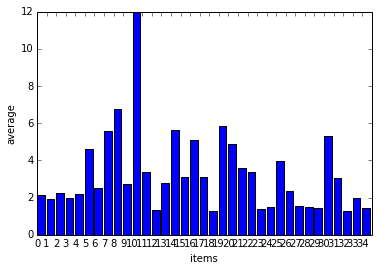

In [12]:
### This will give the BAR graph of items->average. 


from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline

items= [i for i in range(len(item_dictionary.keys()))]
average = avg

plt.bar(items,average)
plt.xticks(items)
plt.xlabel('items')
plt.ylabel('average')
plt.show()

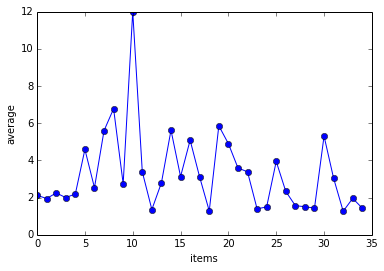

In [13]:
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline

items= [i for i in range(len(item_dictionary.keys()))]
average = avg

plt.plot(items, average,'bo-')
plt.xlabel('items')
plt.ylabel('average')
plt.show()

In [9]:
#To get the files in json folder which start from "reviews_" ..


import os
i = 0
fl = []
for filename in os.listdir("json/."):
    if filename.startswith("reviews_"):
        fl.append(filename)
    else:
        print "already done"


In [18]:
(sorted(fl))[72]

'reviews_063.json'

In [15]:
item_dictionary.keys()[1]

u'B004KZJ0UM'

In [39]:
for i in range(len(sorted(fl))):
    rv = file2string('json/'+ (sorted(fl))[i])
    for r in rv:
        if item_dictionary.keys()[21] in r:
            print (sorted(fl))[i],"\t",r

In [174]:
### This will give the list of tuples which contain the reviews and it's rating. 


lmp = []
for i in range(len(afn)):
    tup = (review_list[i],afn[i])
    lmp.append(tup)

In [98]:
#lmp

In [176]:
dictn={}
dictn[item_ids]=lmp

In [17]:
import nltk

In [20]:
nltk.download()

showing info http://www.nltk.org/nltk_data/
showing info http://www.nltk.org/nltk_data/
showing info http://www.nltk.org/nltk_data/


True

In [27]:
import collections, itertools
import nltk.classify.util, nltk.metrics
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import movie_reviews, stopwords
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures
from nltk.probability import FreqDist, ConditionalFreqDist
from nltk.sentiment.vader import SentimentIntensityAnalyzer

/home/harsh/anaconda/lib/python2.7/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [30]:
sentences = ["VADER is smart, handsome, and funny.", # positive sentence example
...    "VADER is smart, handsome, and funny!", # punctuation emphasis handled correctly (sentiment intensity adjusted)
...    "VADER is very smart, handsome, and funny.",  # booster words handled correctly (sentiment intensity adjusted)
...    "VADER is VERY SMART, handsome, and FUNNY.",  # emphasis for ALLCAPS handled
...    "VADER is VERY SMART, handsome, and FUNNY!!!",# combination of signals - VADER appropriately adjusts intensity
...    "VADER is VERY SMART, really handsome, and INCREDIBLY FUNNY!!!",# booster words & punctuation make this close to ceiling for score
...    "The book was good.",         # positive sentence
...    "The book was kind of good.", # qualified positive sentence is handled correctly (intensity adjusted)
...    "The plot was good, but the characters are uncompelling and the dialog is not great.", # mixed negation sentence
...    "A really bad, horrible book.",       # negative sentence with booster words
...    "At least it isn't a horrible book.", # negated negative sentence with contraction
...    ":) and :D",     # emoticons handled
...    "",              # an empty string is correctly handled
...    "Today sux",     #  negative slang handled
...    "Today sux!",    #  negative slang with punctuation emphasis handled
...    "Today SUX!",    #  negative slang with capitalization emphasis
...    "Today kinda sux! But I'll get by, lol" # mixed sentiment example with slang and constrastive conjunction "but"
... ]

In [31]:
paragraph = "It was one of the worst movies I've seen, despite good reviews. \
... Unbelievably bad acting!! Poor direction. VERY poor production. \
... The movie was bad. Very bad movie. VERY bad movie. VERY BAD movie. VERY BAD movie!"


In [32]:
from nltk import tokenize

In [33]:
lines_list = tokenize.sent_tokenize(paragraph)

In [34]:
sentences.extend(lines_list)

In [35]:
tricky_sentences = [
...    "Most automated sentiment analysis tools are shit.",
...    "VADER sentiment analysis is the shit.",
...    "Sentiment analysis has never been good.",
...    "Sentiment analysis with VADER has never been this good.",
...    "Warren Beatty has never been so entertaining.",
...    "I won't say that the movie is astounding and I wouldn't claim that \
...    the movie is too banal either.",
...    "I like to hate Michael Bay films, but I couldn't fault this one",
...    "It's one thing to watch an Uwe Boll film, but another thing entirely \
...    to pay for it",
...    "The movie was too good",
...    "This movie was actually neither that funny, nor super witty.",
...    "This movie doesn't care about cleverness, wit or any other kind of \
...    intelligent humor.",
...    "Those who find ugly meanings in beautiful things are corrupt without \
...    being charming.",
...    "There are slow and repetitive parts, BUT it has just enough spice to \
...    keep it interesting.",
...    "The script is not fantastic, but the acting is decent and the cinematography \
...    is EXCELLENT!",
...    "Roger Dodger is one of the most compelling variations on this theme.",
...    "Roger Dodger is one of the least compelling variations on this theme.",
...    "Roger Dodger is at least compelling as a variation on the theme.",
...    "they fall in love with the product",
...    "but then it breaks",
...    "usually around the time the 90 day warranty expires",
...    "the twin towers collapsed today",
...    "However, Mr. Carter solemnly argues, his client carried out the kidnapping \
...    under orders and in the ''least offensive way possible.''"
... ]

In [36]:
sentences.extend(tricky_sentences)

In [79]:
#sid = SentimentIntensityAnalyzer()

In [28]:
from nltk.classify import NaiveBayesClassifier

In [386]:
from nltk.corpus import sentiwordnet as swn

In [373]:
happy = swn.senti_synsets('happy', 'a')[0]
print happy

<happy.a.01: PosScore=0.875 NegScore=0.0>


In [374]:
sad = swn.senti_synsets('hate', 'n')[0]
print sad

<hate.n.01: PosScore=0.125 NegScore=0.375>


In [375]:
sentence = """At eight o'clock on Thursday morning
... Arthur didn't feel very good."""

In [377]:
tokens = nltk.word_tokenize(sentence)
tagged = nltk.pos_tag(tokens)

In [378]:
entities = nltk.chunk.ne_chunk(tagged)

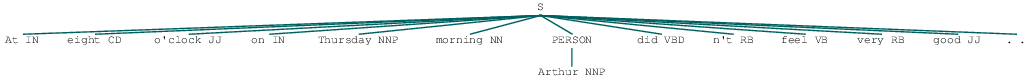

In [379]:
entities

In [380]:
from nltk.corpus import treebank

In [381]:
t = treebank.parsed_sents('wsj_0001.mrg')[0]

In [382]:
t.draw()

In [365]:
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [367]:
from nltk.corpus import brown
brown.words()

[u'The', u'Fulton', u'County', u'Grand', u'Jury', ...]

In [391]:
import pickle
classifier = pickle.load(open("/path/to/NAME_OF_CLASSIFIER.pickle"))

IOError: [Errno 2] No such file or directory: '/path/to/NAME_OF_CLASSIFIER.pickle'

In [179]:
avg = sum(afn)/len(afn)

In [182]:
avg

3.1

In [250]:
dictn.items()[0][1][0][1]

-2.0

In [237]:
i = 0

In [239]:
dictn.values()[0][0][1]

-2.0

In [241]:
##### Find the list of tuple which contains 'touch' word

mp = []
for i in range(len(dictn.values()[0])):
    lst = str(dictn.values()[0][i][0]).lower()
    if re.findall(r'touch\S*', lst):
        tup=(lst,dictn.values()[0][i][1])
        mp.append(tup)
            

In [392]:
def word_feats(words):
    return dict([(word, True) for word in words])
 
negids = movie_reviews.fileids('neg')
posids = movie_reviews.fileids('pos')
 
negfeats = [(word_feats(movie_reviews.words(fileids=[f])), 'neg') for f in negids]
posfeats = [(word_feats(movie_reviews.words(fileids=[f])), 'pos') for f in posids]
 
negcutoff = len(negfeats)*3/4
poscutoff = len(posfeats)*3/4
 
trainfeats = negfeats[:negcutoff] + posfeats[:poscutoff]
testfeats = negfeats[negcutoff:] + posfeats[poscutoff:]
print 'train on %d instances, test on %d instances' % (len(trainfeats), len(testfeats))
 
classifier = NaiveBayesClassifier.train(trainfeats)
print 'accuracy:', nltk.classify.util.accuracy(classifier, testfeats)
classifier.show_most_informative_features()

train on 1500 instances, test on 500 instances
accuracy: 0.728
Most Informative Features
             magnificent = True              pos : neg    =     15.0 : 1.0
             outstanding = True              pos : neg    =     13.6 : 1.0
               insulting = True              neg : pos    =     13.0 : 1.0
              vulnerable = True              pos : neg    =     12.3 : 1.0
               ludicrous = True              neg : pos    =     11.8 : 1.0
                  avoids = True              pos : neg    =     11.7 : 1.0
             uninvolving = True              neg : pos    =     11.7 : 1.0
              astounding = True              pos : neg    =     10.3 : 1.0
             fascination = True              pos : neg    =     10.3 : 1.0
                 idiotic = True              neg : pos    =      9.8 : 1.0


In [3]:
#Replace the word which contains n't i.e wouldn't,shouldn't  
#   with not and return the string.   

def replace_with_not(string):
    ns = " "
    suffix = "n't"
    word = "not"
    for stn in string.split():
        if stn.endswith(suffix):
            stn = stn[:-3]
            ns += stn + ' ' + word + ' '
        else:
            ns += stn + ' '
    print ns

In [4]:
replace_with_not("he doesn't like it wouldn't shouldn't")

 he does not like it would not should not 


In [75]:
#%run "Classification.ipynb"

In [76]:
#item_ids